# Assignment 2

* Student Name: Zixin Hao
* Student ID: ******
* Tutorial Code: 05-P1
* Tutor: ****** and ******

# Part A - Analysing Mail Flow in Australian Capital Cities

## 1.  explore the mail traffic flow of each Australian capital port.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [87]:
df = pd.read_csv('CityPairs.csv')
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,31048,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,31048,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,31048,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,31048,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,31048,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


In [3]:
groupbyPort = df.groupby('AustralianPort').agg({'Mail_In_(tonnes)':'sum','Mail_Out_(tonnes)':'sum'})
groupbyPort = groupbyPort.reset_index()
Adelaide = groupbyPort['AustralianPort'].map(lambda x : x=='Adelaide')
Brisbane = groupbyPort['AustralianPort'].map(lambda x : x=='Brisbane')
Darwin = groupbyPort['AustralianPort'].map(lambda x : x=='Darwin')
Hobart = groupbyPort['AustralianPort'].map(lambda x : x=='Hobart')
Melbourne = groupbyPort['AustralianPort'].map(lambda x : x=='Melbourne')
Perth = groupbyPort['AustralianPort'].map(lambda x : x=='Perth')
Sydney = groupbyPort['AustralianPort'].map(lambda x : x=='Sydney')

capital_port = groupbyPort[Adelaide | Brisbane|Darwin|Hobart|Melbourne|Perth|Sydney]
capital_port = capital_port.reset_index()
capital_port = capital_port[['AustralianPort','Mail_In_(tonnes)','Mail_Out_(tonnes)']]
capital_port

,AustralianPort,Mail_In_(tonnes),Mail_Out_(tonnes)
0,Adelaide,3151.792,3577.532
1,Brisbane,38971.895,37698.235
2,Darwin,401.673,589.191
3,Hobart,5.681,0.293
4,Melbourne,128609.327,70646.588
5,Perth,20788.444,17177.825
6,Sydney,312534.165,177177.967


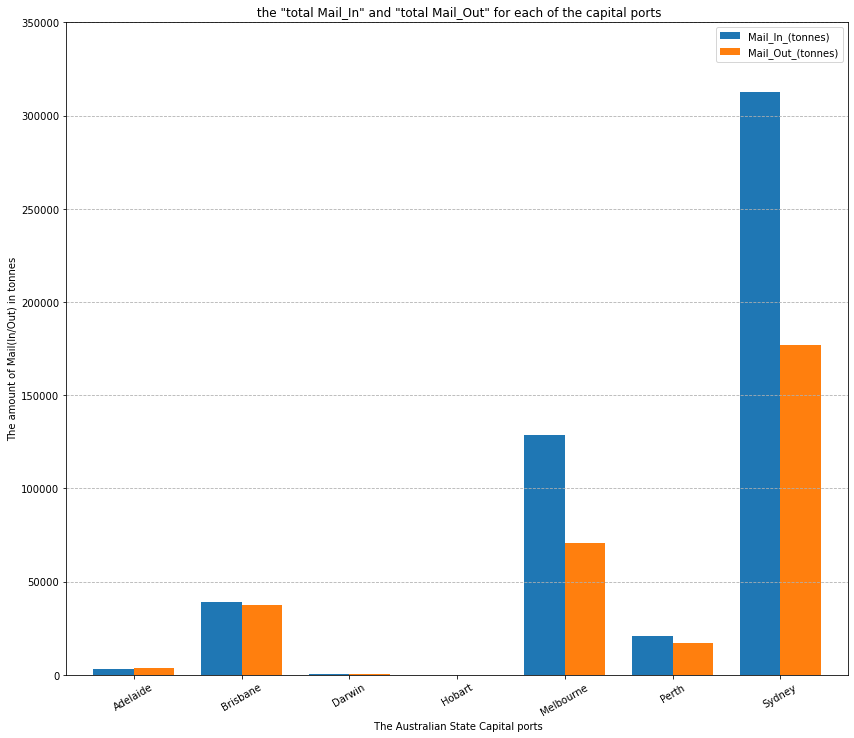

In [4]:
chart = capital_port.plot.bar(figsize=(14,12),width = 0.75)
chart.set_xticklabels(capital_port['AustralianPort'],rotation=30)
plt.xlabel(' The Australian State Capital ports')
plt.ylabel('The amount of Mail(In/Out) in tonnes')
plt.title(' the "total Mail_In" and "total Mail_Out" for each of the capital ports')
plt.ylim(0,350000)
plt.grid(axis='y',linestyle='--')

### 1.1. Which city has the largest amount of mail flowing in? 

Sydney has the largest amount of mail flowing in, it is  312534.165 (tonnes)

### 1.2. Can you properly compare the values for all cities by looking at the plot? Why?  

I cannot properly compare the values for all cities by looking at the plot. Because the plot doesn't show other cities which are not a capital port. Even, we cannot properly compare Hobart and Darwin. The amount of these two cities'mail transformation is not big enough comparing other capital ports so that we cannot get a good columnar shape in the plot.

### 1.3. Why do you think the mail traffic amount is significantly higher for some of the ports? 

        In this diagram, we can notice the mail traffic amount of Sydney and Melbourne is significantly higher. I think the reason is the larger population and the higher development level.
        Australia's largest city and the capital of New South Wales, Sydney is located in the southeast coast of Australia, is Australia's economic, cultural, political and tourism center, the world's famous international metropolis
        Melbourne is the capital and largest city of Victoria state, and the second largest city in the population of Australia. It is known as the "Cultural capital of Australia", and also the national center of culture, business, education, entertainment, catering, sports and tourism
        Sydney and Melbourne are the largest city comparing others, the more people the more mail traffic daily. High development level influence the frequency of using mail, higher level city may have more chances to mail something to change information or inform information



## 2. Create a line chart

In [5]:
df_Perth = df[df['AustralianPort']=='Perth']
df_Perth.reset_index()
df_Perth = df_Perth[['AustralianPort','Year','Mail_Total_(tonnes)']]
df_Perth = df_Perth.groupby('Year').agg({'Mail_Total_(tonnes)': 'sum'})
df_Perth.reset_index(inplace=True) 


In [6]:
df_Brisbane = df[df['AustralianPort']=='Brisbane']
df_Brisbane.reset_index()
df_Brisbane = df_Brisbane[['AustralianPort','Year','Mail_Total_(tonnes)']]
df_Brisbane = df_Brisbane.groupby('Year').agg({'Mail_Total_(tonnes)': 'sum'})
df_Brisbane.reset_index(inplace=True) 


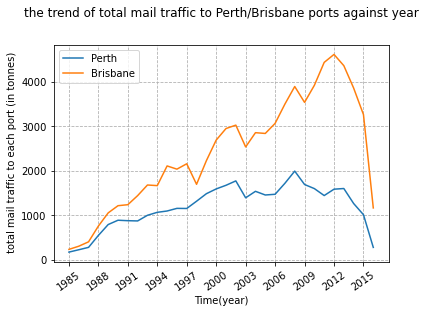

In [7]:
ln1,=plt.plot(df_Perth.Year,df_Perth['Mail_Total_(tonnes)'])
ln2,=plt.plot(df_Brisbane.Year,df_Brisbane['Mail_Total_(tonnes)'])
plt.xticks(df_Perth.Year[::3],rotation=35)
plt.xlabel('Time(year)')
plt.ylabel(' total mail traffic to each port (in tonnes)')
plt.legend(handles=[ln1,ln2],labels=['Perth','Brisbane'])
plt.title('the trend of total mail traffic to Perth/Brisbane ports against year',y=1.1)
plt.grid(linestyle='--')

### 2.1. How was the mail package traffic to each of the Brisbane and Perth ports in the mid-80s?

The mail package traffic to each of the Brisbane and Perth ports in the mid-80s is not good(the number is several hundred) and their amounts are close to each other.

The world's Fair in 1988, held in Brisbane, Australia, was the largest ever in the southern Hemisphere, with 52 countries and regions participating.I think the big activity increased the chance to mail for exchanging information. So, the increasing of 'Brisbane' line is more significant than the line of 'Perth'.

The two areas were sparsely populated and were remote region at the time, so there was little mail traffic.The city is still growing, so the lines are on the rise.


### 2.2. How was the total mail traffic to Brisbane and Perth in 2016? 

    (You should analyse the data and see if 2016 has anything different from the previous years or not. Make sure to use the output of the function “describe()” of Pandas data frame to answer this question).

        the total mail traffic to Brisbane and Perth in 2016 is significantly decreasing comparing the last year.

        On 26 December 2013, due to the heavy decline in mail usage due to competition from e-mail, etc., Australia Post requested an increase in the base rate to 70c.On 4 January 2016, Australia Post requested an increase in the base rate to $1.00 for same reason. So, more and more people prefer to use e-mail or app, the mail traffic amount decreased badly.

#### Brisbane

In [8]:
df_Brisbane["Mail_Total_(tonnes)"].describe()


count      32.000000
mean     2395.941563
std      1257.965538
min       232.588000
25%      1389.400500
50%      2379.408000
75%      3319.829750
max      4611.991000
Name: Mail_Total_(tonnes), dtype: float64

In [9]:
df_Brisbane.tail()

,Year,Mail_Total_(tonnes)
27,2012,4611.991
28,2013,4359.100
29,2014,3856.171
30,2015,3260.702
31,2016,1163.755


#### Perth

In [10]:
df_Perth["Mail_Total_(tonnes)"].describe()


count      32.000000
mean     1186.445906
std       490.796714
min       171.461000
25%       884.753000
50%      1288.560500
75%      1586.243000
max      1991.010000
Name: Mail_Total_(tonnes), dtype: float64

In [11]:
df_Perth.tail()

,Year,Mail_Total_(tonnes)
27,2012,1584.744
28,2013,1599.758
29,2014,1262.836
30,2015,1011.175
31,2016,277.265


# Part B1 - Linear Regression and Prediction

In [88]:
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,31048,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,31048,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,31048,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,31048,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,31048,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


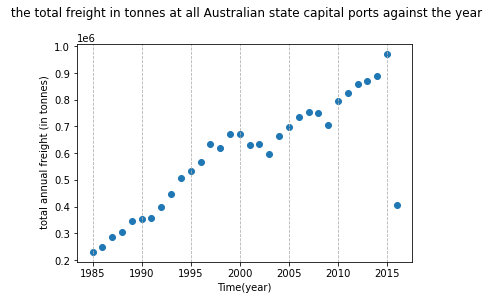

In [13]:


Adelaide = df['AustralianPort'].map(lambda x : x=='Adelaide')
Brisbane = df['AustralianPort'].map(lambda x : x=='Brisbane')
Darwin = df['AustralianPort'].map(lambda x : x=='Darwin')
Hobart = df['AustralianPort'].map(lambda x : x=='Hobart')
Melbourne = df['AustralianPort'].map(lambda x : x=='Melbourne')
Perth = df['AustralianPort'].map(lambda x : x=='Perth')
Sydney = df['AustralianPort'].map(lambda x : x=='Sydney')

capital_portS = df[Adelaide | Brisbane|Darwin|Hobart|Melbourne|Perth|Sydney]
capital_portS = capital_portS[['AustralianPort','Freight_Total_(tonnes)','Year']]
capital_portS

groupbyYear = capital_portS.groupby('Year').agg({'Freight_Total_(tonnes)':'sum'})
groupbyYear = groupbyYear.reset_index()
groupbyYear

plt.scatter(groupbyYear['Year'],groupbyYear['Freight_Total_(tonnes)'])
plt.xlabel('Time(year)')
plt.ylabel(' total annual freight (in tonnes)',x=-2)
plt.title(' the total freight in tonnes at all Australian state capital ports against the year',y=1.1)
plt.grid(axis='x',linestyle='--')

In [14]:
capital_portS.AustralianPort.unique()

array(['Adelaide', 'Brisbane', 'Darwin', 'Hobart', 'Melbourne', 'Perth',
       'Sydney'], dtype=object)

## 1. Does the data show a clear pattern? Describe the relationship you observe.


    Yes, it shows a clear pattern.
    
        it shows a linear ralationship pattern, generally, the independent varable(total annual freight) increased as the dependent varable varies(as  time goes). In this senario, as time goes, the total annual freight in tonnes at all Australian state capital ports is increased against the year
    
        the majority of the data is follow the relationship with some Fluctuations in growth, which is around 1990, 2000,, 2009 year. but there is a data point which is far away from the data points that around 2015 year

## 2. Are there any outliers? 

    If so, use the IQR rule to remove the outliers. IQR ruleis a simple method which can help you to detect the outliers based on the output of function “describe()”.


In [15]:
groupbyYear['Freight_Total_(tonnes)'].describe()

count        32.000000
mean     592518.789969
std      204506.840733
min      230272.052000
25%      403832.119000
50%      632138.236000
75%      739975.605000
max      970265.749000
Name: Freight_Total_(tonnes), dtype: float64

In [16]:

Q1=403832.119000;
Q3=739975.605000;
IQR = Q3-Q1;
range_open=Q1-IQR*1.5;
range_close=Q3+IQR*1.5;
print('1.5*IQR range: ','(',range_open,",",range_close,")");


1.5*IQR range:  ( -100383.10999999993 , 1244190.8339999998 )


## 2  
        According to the IQR rule, I found the "1.5\*IQR range" is from -100383.10999999993 to 1244190.8339999998 in tonnes, 
    and the minimum(230272.052000) and maximum(970265.749000) of the annual freight at all Australian state capital ports is within the range. 
    So, there is no outliers in this data set.

## 3. Create a simple linear regression to model the relationship between Year and the Total Freight. 
     


In [17]:
groupbyYear.head()

,Year,Freight_Total_(tonnes)
0,1985,230272.052
1,1986,247340.715
2,1987,286028.176
3,1988,306648.315
4,1989,345092.750


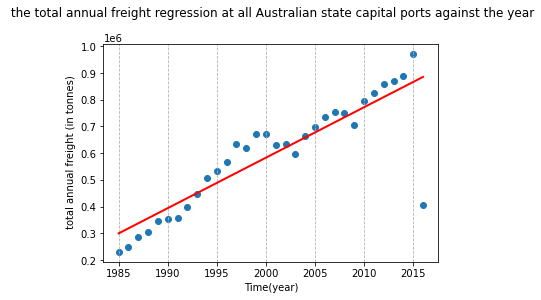

In [18]:
slope, intercept, r_value, p_value, std_err = linregress(groupbyYear['Year'],groupbyYear['Freight_Total_(tonnes)'])
# With the slope and the intercept we can use the 'for' syntax to compute the line (a list of y-values corresponding to the input x-values)

line = [slope*xi + intercept for xi in groupbyYear['Year']]
# We can then plot the 'line': 

plt.plot(groupbyYear['Year'],line,'r-', linewidth=2)
# And add the original data points to the same plot:

plt.scatter(groupbyYear['Year'],groupbyYear['Freight_Total_(tonnes)'])
plt.xlabel('Time(year)')
plt.ylabel(' total annual freight (in tonnes)',x=-2)
plt.title(' the total annual freight regression at all Australian state capital ports against the year',y=1.1)
plt.grid(axis='x',linestyle='--')
plt.show() 


## 3 

    Does the linear fit look to be a good fit? Justify your answer.

    Yes, the linear fit looks to be a good fit.
    
        The line model capture majority of the data points except the last abnomal value and the model are consistent and accurate on average.It doesn't show the phenomenon of underfitting or overfitting, and the model can predict more accurate value.One more thing, these small fluctuations are also along the line and do not influence the trend, so we don't need add the complexity of the model.
    

## 4. How fast is the total amount of freight increasing each year?
    [Hint: Think about what parameter in the regression model represents the rate of change]


In [19]:
slope

18894.492339992667

According to "y = a + bx" equation, b represents the rate of change.
so, the rate of change is 18894.492339992667, which means the total amount of freight increases 18894.492339992667 tonnes on average each year.


## 5. What does the linear model predict for the total freight volume at Australian state capital ports in 2020?


In [20]:
xi=2020
Y = slope*xi + intercept
Y

960961.39059861

It is 960961.39059861 tonnies that the linear model predicts for the total freight volume at Australian state capital ports in 2020

## 6. 
    Try fitting the linear model only to the data from the year 2005 onwards. What
    happens to the prediction for 2020? Which prediction could you trust more?
    Why? 

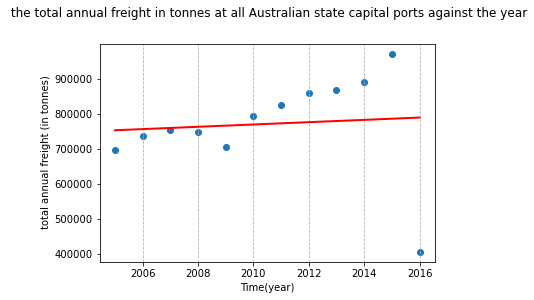

In [21]:
groupbyYear2 = groupbyYear[groupbyYear["Year"]>=2005]
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(groupbyYear2['Year'],groupbyYear2['Freight_Total_(tonnes)'])
# With the slope and the intercept we can use the 'for' syntax to compute the line (a list of y-values corresponding to the input x-values)

line2 = [slope2*x2i + intercept2 for x2i in groupbyYear2['Year']]
# We can then plot the 'line': 

plt.plot(groupbyYear2['Year'],line2,'r-', linewidth=2)
# And add the original data points to the same plot:

plt.scatter(groupbyYear2['Year'],groupbyYear2['Freight_Total_(tonnes)'])
plt.xlabel('Time(year)')
plt.ylabel(' total annual freight (in tonnes)',x=-2)
plt.title(' the total annual freight in tonnes at all Australian state capital ports against the year',y=1.1)
plt.grid(axis='x',linestyle='--')
plt.show() 


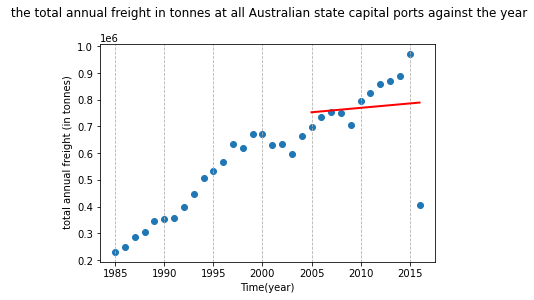

In [22]:
plt.plot(groupbyYear2['Year'],line2,'r-', linewidth=2)
# And add the original data points to the same plot:

plt.scatter(groupbyYear['Year'],groupbyYear['Freight_Total_(tonnes)'])
plt.xlabel('Time(year)')
plt.ylabel(' total annual freight (in tonnes)',x=-2)
plt.title(' the total annual freight in tonnes at all Australian state capital ports against the year',y=1.1)
plt.grid(axis='x',linestyle='--')
plt.show() 


In [23]:
x2i=2020
Y2 = slope2*x2i + intercept2
Y2

802553.1542925397

    The prediction for 2020 by this linear model is 802553.1542925397(tonnies). It is much less than 960961.39059861(prediction of first model)
    
    I think the first model(original one) is the better one and I could trust more.
    Because the second one is underfitting. 
        Firstly, from the scatter starting from 2005 in diagram 1, the shape is like increasing wave not line. So, its complexity is not enough and bias will be bigger comparing the first model.
        Secondly, from the second diagram above, it is obvious that the prediction is not accurate if we assume the data set before 2005 is the test data set. it has high bias and high variance.
        Thirdly, little trainning dataset can result the regression cannot learn the truth trend, and also can be effected easily by some rare extrem value. so the larger the trainning data sets, the better the model.
    
    
    

In [24]:
print('second model: ','R:',r_value2,'P:', p_value2,'std:', std_err2)
print('first model: ','R:',r_value,'P:', p_value,'std:', std_err)

second model:  R: 0.08406402403478092 P: 0.7950605953935111 std: 12367.156116906628
first model:  R: 0.8666998553936882 P: 1.4324411666853666e-10 std: 1985.4476174208417


we also can compare the R value, P value and std_error of these two model to find which one is better.

**R-value** is a statistical measure of how close the data are to the fitted regression line.(the R-value of the better model is closer to 1)

 **p-value** is a measure of the probability that an observed difference could have occurred just by random chance. The lower the p-value, the greater the statistical significance of the observed difference.

**standard error** is the standard deviation of its sampling distribution or an estimate of that standard deviation. The lower the std, the greater the sample.

they all show the first model is better.

# Part B2 - Comparing Traffic Volumes 

## 1

You first need to calculate the total number of Passengers_In and the total
number of Passengers_Out for each unique month over the years for all the
Australian ports. (i.e consider each month of each year as a unique month to
calculate the total number of passengers. You can make use of the column
“Month” for this). Next, create histograms to check the distribution of monthly
Passengers_In and monthly Passengers_Out. Describe the distributions. Can
you see any outliers in the plots? Discuss your answer. 

In [25]:
df.head()
groupbyMonth = df.groupby('Month').agg({'Passengers_In':'sum','Passengers_Out':'sum'})
groupbyMonth = groupbyMonth.reset_index()
groupbyMonth

,Month,Passengers_In,Passengers_Out
0,31048,263795,208770
1,31079,204953,179222
2,31107,209513,231582
3,31138,182673,214403
4,31168,198902,224350
...,...,...,...
372,42370,1918279,1642059
373,42401,1560692,1375060
374,42430,1470519,1538491
375,42461,1481204,1478169


count    3.770000e+02
mean     7.317297e+05
std      3.759759e+05
min      1.826730e+05
25%      4.079340e+05
50%      6.662590e+05
75%      9.944660e+05
max      1.918279e+06
Name: Passengers_In, dtype: float64

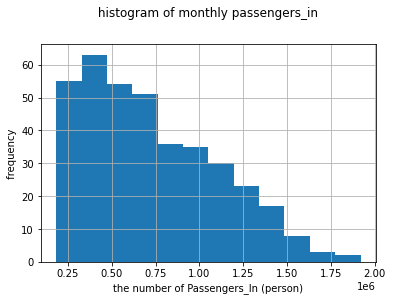

In [26]:
groupbyMonth['Passengers_In'].hist(bins=12)

plt.xlabel('the number of Passengers_In (person)')
plt.ylabel(' frequency ',x=-2)
plt.title(' histogram of monthly passengers_in ',y=1.1)

groupbyMonth['Passengers_In'].describe()


count    3.770000e+02
mean     7.210568e+05
std      3.673378e+05
min      1.783190e+05
25%      4.037060e+05
50%      6.561840e+05
75%      9.759200e+05
max      1.847744e+06
Name: Passengers_Out, dtype: float64

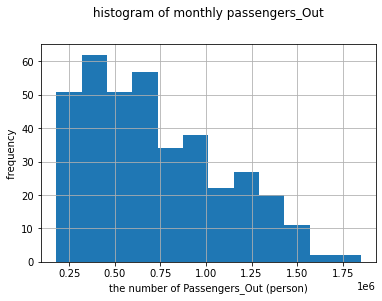

In [27]:
groupbyMonth['Passengers_Out'].hist(bins=12)

plt.xlabel('the number of Passengers_Out (person)')
plt.ylabel(' frequency ',x=-2)
plt.title(' histogram of monthly passengers_Out ',y=1.1)

groupbyMonth['Passengers_Out'].describe()

I cannot see some outliers in the plots.

For the diagrams of these two histogram , the frequency is both decreasing as the number of Passengers_Out or Passengers_In increases.
Thire shapes are similar to chi square distribution, the tails of these two distributions are most likely outliers.(frequency are preaty low and far away from majority of data and cluster(0.5\*10^6) ) . but without accurate calculation, we cannot konw if the tail is away enough from the high frequency center (beyond 3 standard deviations) and how many outliers are there.

## 2

Use boxplots to visualise the information of question 1.1. How many outliers
can you see in the plots? Use the IQR rule to show the data points which are
considered as outliers of monthly Passengers_In and monthly Passengers_Out)

boxplot for Passengers_In:

count    3.770000e+02
mean     7.317297e+05
std      3.759759e+05
min      1.826730e+05
25%      4.079340e+05
50%      6.662590e+05
75%      9.944660e+05
max      1.918279e+06
Name: Passengers_In, dtype: float64

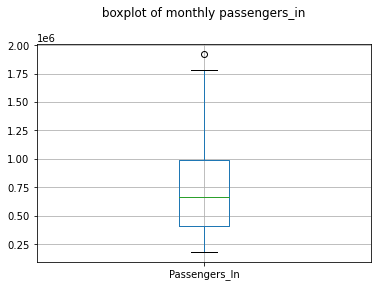

In [28]:

groupbyMonth.boxplot(column = 'Passengers_In')
plt.title(' boxplot of monthly passengers_in ',y=1.1)
groupbyMonth['Passengers_In'].describe()

#### Answer: one outlier I can see in the plot

IQR rule: 

In [29]:
#for Passengers_In

Q1=4.079340e+05;
Q3=9.944660e+05;
IQR = Q3-Q1;
range_open=Q1-IQR*1.5;
range_close=Q3+IQR*1.5;
print("for Passengers_In:\n")
print('1.5*IQR range: ','(',range_open,",",range_close,")");

print("\ndata points(outliers): ")
dataPoint = groupbyMonth[(groupbyMonth['Passengers_In']>range_close)|(groupbyMonth['Passengers_In']<range_open)]
dataPoint[['Month','Passengers_In']]

for Passengers_In:

1.5*IQR range:  ( -471864.0 , 1874264.0 )

data points(outliers): 


,Month,Passengers_In
372,42370,1918279


boxplot for Passengers_Out:

count    3.770000e+02
mean     7.210568e+05
std      3.673378e+05
min      1.783190e+05
25%      4.037060e+05
50%      6.561840e+05
75%      9.759200e+05
max      1.847744e+06
Name: Passengers_Out, dtype: float64

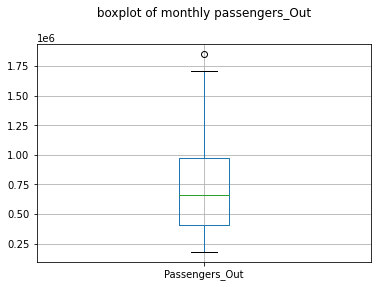

In [30]:
groupbyMonth.boxplot(column = 'Passengers_Out')
plt.title(' boxplot of monthly passengers_Out ',y=1.1)
groupbyMonth['Passengers_Out'].describe()

#### Answer: one outlier I can see in the plot

IQR rule:

In [31]:
#for Passengers_Out

Q1=4.037060e+05;
Q3=9.759200e+05;
IQR = Q3-Q1;
range_open2=Q1-IQR*1.5;
range_close2=Q3+IQR*1.5;
print("for Passengers_Out:\n")
print('1.5*IQR range: ','(',range_open2,",",range_close2,")");

print("\ndata points(outliers): ")
dataPoint2 = groupbyMonth[(groupbyMonth['Passengers_Out']>range_close2)|(groupbyMonth['Passengers_Out']<range_open2)]
dataPoint2[['Month','Passengers_Out']]


for Passengers_Out:

1.5*IQR range:  ( -454615.0 , 1834241.0 )

data points(outliers): 


,Month,Passengers_Out
371,42339,1847744


two outliers I can see in the plots, one for Passengers_Out and one for Passengers_In.

## 3

As you can see in question 1.2, the information which is provided by a boxplot
is so similar to the information which we saw in the output of the function
“describe()”. However, they are not the same. What are the differences between
the information which are shown in a box plot and the output of function
“describe()”?


1. the output of function "describe()" can show the number of data points and the mean of the datasets which don't have in boxplot

2. Boxplot is used to show overall patterns of response for a group. They provide a useful way to visualise the range and other characteristics of responses for a large group. It cannot show exact data(like what is the exact value of the upper quartile), It gives us a general shape.

   The output of function "describe()" can give us an exact value but we cannot get the general shape to image what the dataset distribution is. It cannot achieves the purpose of the visualisation.
   
3. We can compare the varieties of different boxplot shapes and positions to get more information in a diagram. But it is not easy to compare datasets if we only get lots of description of datasets(the output of function"describe()")


# Part C - Clustering task

In [32]:
df2 = pd.read_csv('ClusteringData.csv')
df2.head()

,GDP per Capita,Suicide Rate
0,1.44178,0.44453
1,1.52733,0.41203
2,1.42666,0.14975
3,1.57744,0.35776
4,1.40598,0.41004


In [33]:
df2.shape

(157, 2)

Text(0, 0.5, 'Suicide Rate')

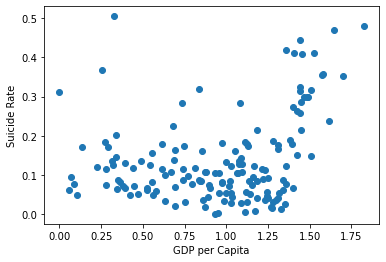

In [34]:
%matplotlib inline
plt.scatter(x=df2['GDP per Capita'],y=df2['Suicide Rate'])
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')

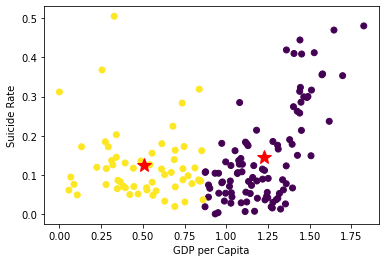

In [74]:
kmeans = KMeans(n_clusters=2,init='random').fit(df2[['GDP per Capita','Suicide Rate']])
kmeans.cluster_centers_
kmeans.labels_
plt.scatter(x=df2['GDP per Capita'],y=df2['Suicide Rate'], c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=15,c='r')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.show()

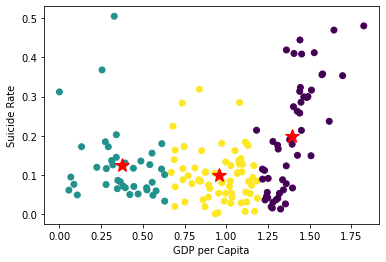

In [36]:
kmeans = KMeans(n_clusters=3,init='random').fit(df2[['GDP per Capita','Suicide Rate']])
kmeans.cluster_centers_
kmeans.labels_
plt.scatter(x=df2['GDP per Capita'],y=df2['Suicide Rate'], c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=15,c='r')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.show()

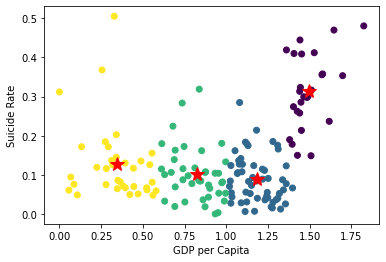

In [81]:
kmeans = KMeans(n_clusters=4,init='random').fit(df2[['GDP per Capita','Suicide Rate']])
kmeans.cluster_centers_
kmeans.labels_
plt.scatter(x=df2['GDP per Capita'],y=df2['Suicide Rate'], c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=15,c='r')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.show()

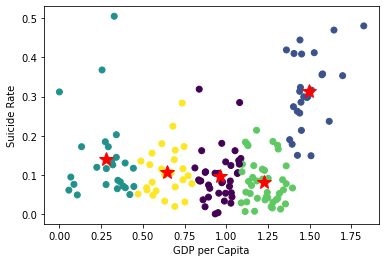

In [86]:
kmeans = KMeans(n_clusters=5,init='random').fit(df2[['GDP per Capita','Suicide Rate']])
kmeans.cluster_centers_
kmeans.labels_
plt.scatter(x=df2['GDP per Capita'],y=df2['Suicide Rate'], c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=15,c='r')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.show()

I think 2 is the best value of K based on my visualisation.

according to the concept of "The elbow method":

    When K is less than the true number of clusters in the sample J, the aggregation degree of each cluster will be greatly increased with each increase of K by one unit, and then the decline of SSE will be large.
    When K is close to J, the aggregation degree return obtained by increasing K will decrease rapidly, and the decline amplitude of SSE will also decrease.
    As K continues to increase, the change of SSE tends to be flat.
    
So,based on the visualisations, 1 is not enough because The degree of aggregation of each cluster is not high. From 1 to 2 (k-value), I think the aggregation degree of each cluster is greatly increased with the increase of K by one unit. But if keep increasing k-value, the change of the degree of each clusterring is not obvious in the visualisations and it is not necessary to keep to divide those data points which are at the bottom. So I think 2 is the best k-value.

    There are two clusters:
        Cluster A(the left one),in which the port has a lower GDP per Capita and Suicide Rate is from 0 to 0.5.
        Cluster B(the right one),in which the port has a higher GDP per Capita and Suicide Rate is from 0 to 0.5.
    I considered the GDP per Capita which is smaller than 0.88 as lower GDP per Capita.

note:
1. The clusters of A and B both have similar characteristics that is the cluster is dense at the bottom(lower rate place).
2. The ports where GDP per Capita is too high or too low both have higher suicide rate. 

        

## Challenge1:

### 1. Explain how the Silhouette score works and what is the meaning of having the following results as a Silhouette score?

    1.1. Silhouette Score is 0.02
    1.2. Silhouette Score is -0.06
    1.3. Silhouette Score is 0.97
    1.4. Silhouette score is -0.9 

how the Silhouette score works:

In the clusters we hope to get, the points in the clusters should be as close as possible and the clusters should be as far away from each other as possible. The Silhouette score is the evaluation index of class density and dispersion. 

formula: Silhouette Score = (b-a)/max(a,b)-------- #value ranges from -1 to 1.

    note:
1. a= average intra-cluster distance i.e the average distance between each point within a cluster.
2. b= average inter-cluster distance i.e the average distance between all clusters.
3. 1: Means clusters are well apart from each other and clearly distinguished.
4. 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
5. -1: Means clusters are assigned in the wrong way.
6. max() is a function which can return a maximum value from (a,b)

the meaning of having the following results as a Silhouette score:

1.1

The score is close to 0, which means the distance between clusters is not significant.

1.2

The score is negative and close to 0, which means the distance between clusters is not significant and having little part of overlap between the two clusters.Some points belong to two clusters at the same time. That means clusters are assigned in the wrong way. 

1.3

The score is close to 1, which means clusters are well apart from each other and clearly distinguished

1.4

The score is negative and close to 1, which means most areas of the two clusters are overlapped. The clusters are assigned in the wrong way.

### 2. Implement Silhouette score in Sklearn and find out the best number of clusters (K) based on the silhouette score

The best number of K based on the silhouette score is 2

In [39]:
kmeans = KMeans(n_clusters=2,init='random').fit(df2[['GDP per Capita','Suicide Rate']])
kmeans.cluster_centers_
kmeans.labels_

Z=df2[['GDP per Capita','Suicide Rate']]
label=kmeans.labels_
print(f'Silhouette Score(n=2) : {silhouette_score(Z,label)}')

Silhouette Score(n=2) : 0.5627073439692872


In [40]:
kmeans = KMeans(n_clusters=3,init='random').fit(df2[['GDP per Capita','Suicide Rate']])
kmeans.cluster_centers_
kmeans.labels_

Z=df2[['GDP per Capita','Suicide Rate']]
label=kmeans.labels_
print(f'Silhouette Score(n=3) : {silhouette_score(Z,label)}')

Silhouette Score(n=3) : 0.4890745742619508


In [41]:
kmeans = KMeans(n_clusters=4,init='random').fit(df2[['GDP per Capita','Suicide Rate']])
kmeans.cluster_centers_
kmeans.labels_

Z=df2[['GDP per Capita','Suicide Rate']]
label=kmeans.labels_
print(f'Silhouette Score(n=4) : {silhouette_score(Z,label)}')

Silhouette Score(n=4) : 0.4861623656777933


## Challenge 2:

### 1. What is the transformation which you used?


power transformation (square transformation)

(independent variable and dependent variable to the power of 2)

### 2. Do you think your decision to transform the data with that transformation is a good idea? Discuss your answer

I think it is a good idea.

In the first relationship between independent variable and dependent variable, I notice that the relationship is one independent variable has two value (same absolute value,one is negative,one is positive). The model is not linear or polynomial model and not good to analyze and work on it. 

The purpose of doing some transformation on the data is make it conform to the assumptions that we've made, so that we can analyze it theoretically and do prediction. We can do a better prediction based on second relationship. We can reverse the value after prediction, just taking square root of the values(x;y) and remaining one positive and one negative for y and then remaining one positive for x. 

As part of the data pre-processing for conducting regression, a residual plot is often plotted. If in such residual plot the dataset exhibits nonlinearity, a standard treatment would be to "transform" the raw data to make it more linear. This allows us to use linear regression or polynomial techniques more effectively with nonlinear data.



# reference

https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule

https://www.quora.com/What-are-some-common-transformations-I-can-make-in-univariate-regression